<a href="https://colab.research.google.com/github/umerzia-7001/Traffic_Sign_classifier/blob/master/traffic_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')

!pip3 install numpy
!pip3 install matplotlib
!pip3 install PIL



import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!git clone https://bitbucket.org/jadslim/german-traffic-signs
!ls german-traffic-signs

#!apt install p7zip-full
#!7z x '/content/drive/My Drive/traffic_dataset.zip'
#cur_path='/content/drive/My Drive'
data = []
labels = []
classes = 43

#cur_path = os.getcwd()
#Retrieving the images and their labels 
#for i in range(classes):
#    path = os.path.join(cur_path,'traffic_dataset/Test')
#    
#    images = os.listdir(path)
#    for a in images:
#        try:
 #           image = Image.open(path + '/'+ a)
 #           # resizing and converting image into array
 #           image = image.resize((30,30))
 #           image = np.array(image)
 #           data.append(image)
 #           labels.append(i)
 #       except:
  #          print("Error loading image")
  #          break
#Converting lists into numpy arrays
#data = np.array(data)
#labels = np.array(labels)
#print(data.shape, labels.shape)


fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.
signnames.csv  test.p  train.p	valid.p


In [ ]:
import pickle
with open('german-traffic-signs/train.p', 'rb') as f:
  train = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  valid = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test = pickle.load(f)
  
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
# splitting into training test set
#,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.1)


print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# converting labels into one hot form

y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)
y_valid=pd.get_dummies(y_valid)

print('one hot form :')
print(y_train.shape,y_test.shape)

input_shape=(32,32, 3)

(34799, 32, 32, 3) (12630, 32, 32, 3) (34799,) (12630,)
one hot form :
(34799, 43) (12630, 43)


In [ ]:
#  Building Alexnet model having 8 layers 


model = Sequential()
  # add the convolutional layer
  #filters, size of filters,input_shape,activation_function
model.add(Conv2D(60,(5,5), input_shape= (32,32,3), activation = 'relu'))
model.add(Conv2D(60,(5,5), input_shape= (32,32,3), activation = 'relu'))
  #pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
  # add another convolutional layer
model.add(Conv2D(30, (3, 3) , activation = 'relu'))
model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  # pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

  
model.add(Dropout(0.3))
  
  #Flatten the image to 1 dimensional array
model.add(Flatten())
  #add a dense layer : amount of nodes, activation
model.add(Dense(500, activation = 'relu'))
  # place a dropout layer
  #0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
  # defining the ouput layer of our network
model.add(Dense(classes, activation = 'softmax'))
  
    
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        4560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [ ]:
EPOCHS=10
#in_lr=1e-3

cb=EarlyStopping(patience=4,monitor='val_loss',verbose=1)
cp=ModelCheckpoint('best_traffic_model',save_best_only=True,monitor='val_loss',verbose=1)

#def lr_rate(EPOCHS):
    
    #lr=1e-2
    #if EPOCHS>80:
    #    lr *= 1e-1
    #return lr
#lr_rate(EPOCHS)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=3,
                               min_lr=0.5e-5)
 
    
callback=[cb,cp,lr_reducer]   
from keras.optimizers import SGD

opt=Adam(lr = 0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=EPOCHS,callbacks=callback,shuffle=True,batch_size=52,validation_data=(X_valid, y_valid))   
    
model.save("my__traffic_model.h5")


    
    

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 8s 227us/step - loss: 2.6836 - accuracy: 0.3138 - val_loss: 1.0535 - val_accuracy: 0.7331

Epoch 00001: val_loss improved from inf to 1.05347, saving model to best_traffic_model
Epoch 2/10
34799/34799 [==============================] - 5s 155us/step - loss: 0.6937 - accuracy: 0.8053 - val_loss: 0.2617 - val_accuracy: 0.9465

Epoch 00002: val_loss improved from 1.05347 to 0.26172, saving model to best_traffic_model
Epoch 3/10
34799/34799 [==============================] - 5s 153us/step - loss: 0.2942 - accuracy: 0.9215 - val_loss: 0.1522 - val_accuracy: 0.9590

Epoch 00003: val_loss improved from 0.26172 to 0.15215, saving model to best_traffic_model
Epoch 4/10
34799/34799 [==============================] - 5s 152us/step - loss: 0.2224 - accuracy: 0.9406 - val_loss: 0.1324 - val_accuracy: 0.9667

Epoch 00004: val_loss improved from 0.15215 to 0.13241, saving model to best_traffic_m

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])




12630/12630 [==============================] - 1s 92us/step
The test score is:  0.2267117866256629
The Accuracy score is:  0.9575613737106323


In [ ]:
#.    GridSearch alternate method for hyperparam tuning
#from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
#parameters = {'batch_size' : [32, 64],
#              'epochs' : [500, 100],
#              'optimizer' : ['adam', 'rmsprop']}
#classifier = KerasClassifier(build_fn = model)
#grid_search = GridSearchCV(estimator = classifier,
#                           param_grid = parameters,
#                           scoring = 'accuracy',
#                           cv = 10)

#grid_search.fit(X_train,y_train,validation_data=(X_valid, y_valid))

Text(0.5, 0, 'epoch')

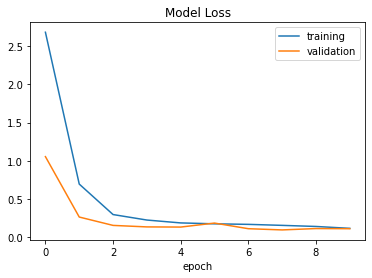

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

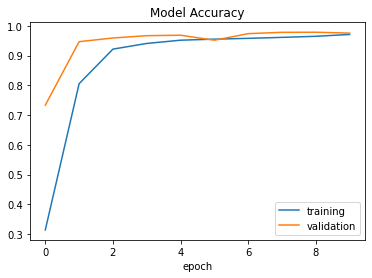

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
model = load_model('my__traffic_model.h5')
#y_pred=model.predict(X_test)
# displaying scores

#classification_report(y_true=y_test,y_pred=y_pred)

#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)

